In [1]:
import pandas as pd
import numpy as np
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

from PIL import Image
import matplotlib.pyplot as plt
import random
import torch

In [2]:
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

In [3]:
# meta와 train데이터 가져오기
meta = pd.read_csv('../datasets_fin/meta.csv')
train_data = pd.read_csv('../datasets_fin/train.csv')

In [4]:
# transform
trn_transform = A.Compose([
    # 이미지 크기 조정
    # A.Resize(height=256, width=256),
    # images normalization
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # numpy 이미지나 PIL 이미지를 PyTorch 텐서로 변환
    # ToTensorV2(),
    # 픽셀드롭아웃
    # A.CoarseDropout(max_holes=16, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16)
    # 기울이기
    # A.Rotate(limit=45, p=0.5),
    # A.Rotate(limit=90)
    A.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT, p=1.0),
])

In [5]:
# idx로 img 가져오기
def get_item(idx):
    name, target = train_data.loc[idx,]
    img = np.array(Image.open(os.path.join("../datasets_fin/train/", name)))

    # img = trn_transform(image=img)['image']
    return img, target, name

테스트 데이터 셋에서 확인가능한 증강
- 회전
- 반전
- 크롭(절단)
- 노이즈(가우시안?)
- 블러
- 다수의 이미지를 겹침

데이터 증강 함수
- A.Resize(height=256, width=256) : 사이즈 변경
- A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) : 이미지 픽셀 정규화
- A.CoarseDropout(max_holes=16, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16) : 픽셀 드롭아웃(구멍뚫기)
- A.Rotate(limit=(115, 115), border_mode=cv2.BORDER_CONSTANT,value=[255, 255, 255], p=1.0) : 비율 유지하여 회전, 빈공간 흰색
- A.VerticalFlip(always_apply=False, p=0.5) : 좌우반전
- A.HorizontalFlip(always_apply=False, p=1.0) : 상하반전
- A.Blur(always_apply=True, p=1.0, blur_limit=(3, 7)) : 블러
- A.GaussNoise(always_apply=False, p=1.0, var_limit=(10.0, 50.0)) : 가우시안, 되는지 의문
- A.Downscale(always_apply=False, p=1.0, scale_min=0.35, scale_max=0.35, interpolation=0) : 픽셀다운, 모자이크
- 믹스 추가필요

서로 다른

In [18]:
# transform
trn_transform = A.Compose([
    # 이미지 크기 조정
    A.Resize(height=256, width=256),
    # images normalization
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # numpy 이미지나 PIL 이미지를 PyTorch 텐서로 변환
    # ToTensorV2(),
    # 픽셀드롭아웃
    # A.CoarseDropout(max_holes=30, max_height=16, max_width=16, min_holes=10, min_height=16, min_width=16, p=1)
    # 기울이기
    # A.Rotate(limit=45, p=0.5),
    # A.Rotate(limit=90, p=1),
    # blur_limit(int, (int, int)) : 입력 이미지를 흐리게 하기 위한 최대 커널 크기, default=(3, 7)
    # A.Blur(always_apply=True, p=1.0, blur_limit=(3, 3)),
    # 좌우반전
    # A.VerticalFlip(always_apply=False, p=1),
    # 상하반전
    # A.HorizontalFlip(always_apply=False, p=1.0),
    # A.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT, p=1.0),
    # 반시계방향으로 45~90도 무작위 회전
    # A.Rotate(limit=(0, 360), border_mode=cv2.BORDER_CONSTANT,value=[255, 255, 255], p=1.0),
    A.GaussNoise(always_apply=False, p=1, var_limit=(0.3, 0.3)),
    # A.Downscale(always_apply=False, p=1, scale_min=0.5, scale_max=0.5, interpolation=0),
    # A.GaussianBlur(blur_limit=(3, 11), p=1.0)
    # A.RandomGridShuffle( grid = (3 , 3) , always_apply = False , p = 1 )
    # A.RandomBrightness( limit = 0.2 , always_apply = False , p = 1 )
    # A.GaussianBlur( blur_limit = (3,7) , always_apply = False , p = 1 )
    # A.ToGray( always_apply = False , p = 1 )
    # A.CenterCrop( 224 , 224 , always_apply = False , p = 1.0 )
    # A.RandomCrop(224, 224, always_apply=False, p=1.0),
    # A.PadIfNeeded(min_height=224, min_width=224, border_mode=cv2.BORDER_CONSTANT, value=0)
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# idx로 img 가져오기
def get_item(idx):
    name, target = train_data.loc[idx,]
    img = np.array(Image.open(os.path.join("../datasets_fin/train/", name)))

    img = trn_transform(image=img)['image']
    return img, target, name

In [13]:
train_data

ID  target
0     002f99746285dfdd.jpg      16
1     008ccd231e1fea5d.jpg      10
2     008f5911bfda7695.jpg      10
3     009235e4c9c07af5.jpg       4
4     00b2f44967580c74.jpg      16
...                    ...     ...
1565  fed9e9ec4a77bc06.jpg       4
1566  feeade617aa68c45.jpg       7
1567  ff51dd281a8423f1.jpg      11
1568  ff8a6a251ce51c95.jpg       5
1569  ffc22136f958deb1.jpg       9

[1570 rows x 2 columns]

In [61]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
class ImageDataset(Dataset):
    def __init__(self, csv, path, transform=None):
        self.df = pd.read_csv(csv).values
        self.path = path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        name, target = self.df[idx]
        img = np.array(Image.open(os.path.join(self.path, name)))
        if self.transform:
            img = self.transform(image=img)['image']
        return img, target, name
    
trn_dataset = ImageDataset(
    "../datasets_fin/divided_train.csv",
    "../datasets_fin/train/",
    transform=trn_transform
)
trn_loader = DataLoader(
    trn_dataset,
    batch_size=32,
    shuffle=True,
    # shuffle=True,
    num_workers=0,
    pin_memory=True,
    drop_last=False
)

In [69]:
# for i in range(10):
#     img, target, name = trn_dataset.__getitem__(i)
#     print(img.shape, name)
#     plt.imshow(img)
#     plt.show()

(256, 256, 3) 149c8444ae80d630.jpg


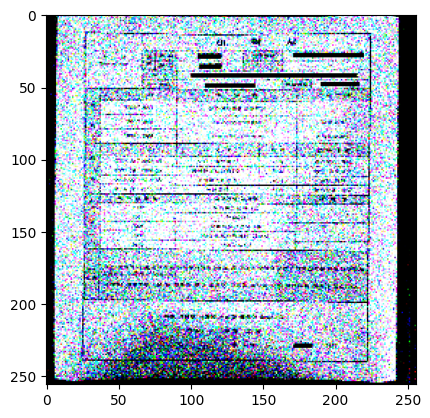

(256, 256, 3) 149c8444ae80d630.jpg


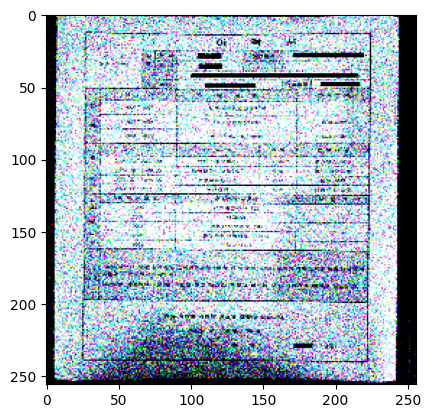

(256, 256, 3) 149c8444ae80d630.jpg


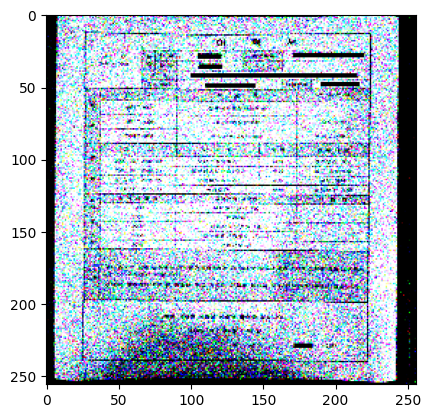

(256, 256, 3) 149c8444ae80d630.jpg


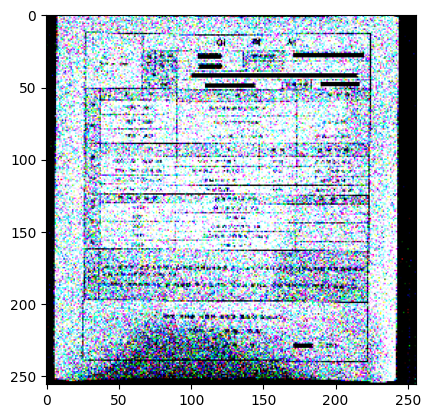

(256, 256, 3) 149c8444ae80d630.jpg


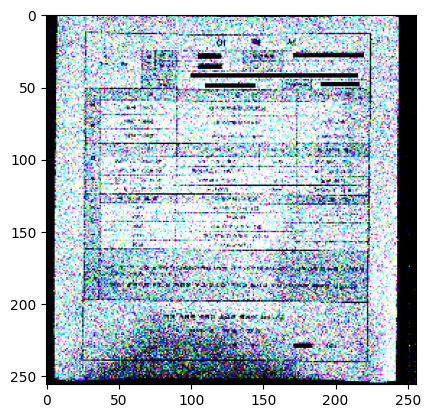

(256, 256, 3) 149c8444ae80d630.jpg


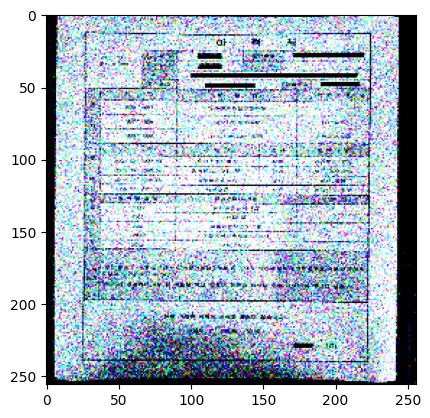

(256, 256, 3) 149c8444ae80d630.jpg


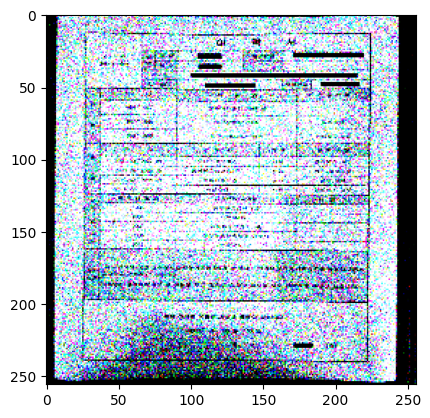

(256, 256, 3) 149c8444ae80d630.jpg


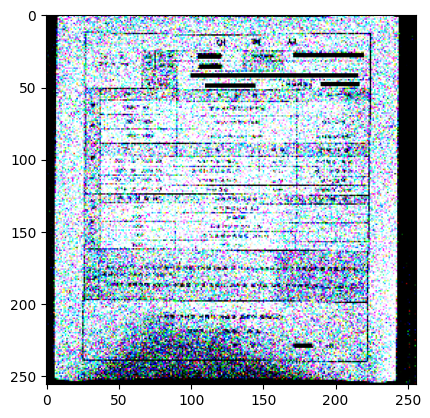

(256, 256, 3) 149c8444ae80d630.jpg


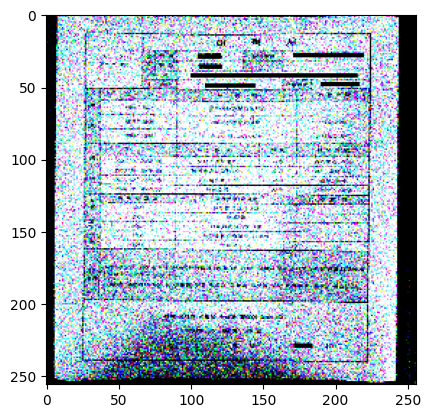

(256, 256, 3) 149c8444ae80d630.jpg


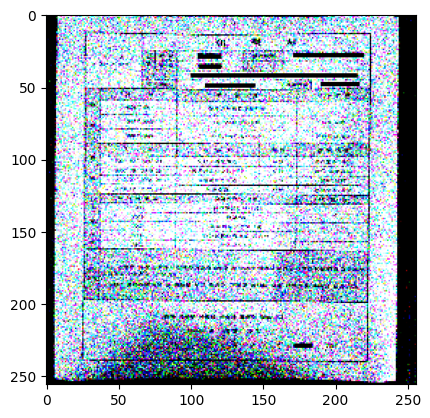

In [19]:
for _ in range(10):
    img, target, name = get_item(134)
    print(img.shape, name)
    plt.imshow(img)
    plt.show()